<a href="https://colab.research.google.com/github/ohmylok/loan_detection/blob/main/loan_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import data and necessary packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data
%time data = pd.read_csv('/content/drive/MyDrive/Project dataset/Fraud detection/loan_data.csv')

print(data.shape)


CPU times: user 3.65 s, sys: 687 ms, total: 4.33 s
Wall time: 6.23 s
(307511, 122)


2. Data preprocessing

In [4]:
data = data.drop('SK_ID_CURR', axis = 1)
data

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# getting the information related to data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


In [6]:
# getting the description related to data
data.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
#postive statistics
data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
#positive rate of dataset
print('Target rate', data['TARGET'].mean())

Target rate 0.08072881945686496


3. Data preprocessing visualization

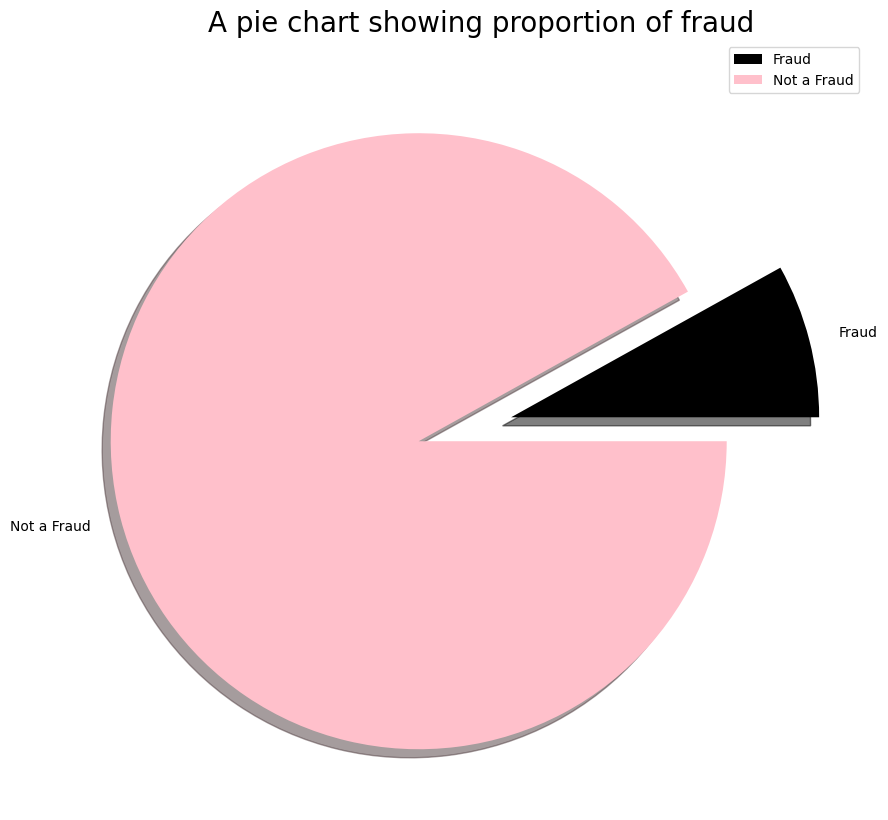

In [9]:
# Fraud proportion visualization
labels = ['Fraud', 'Not a Fraud']
colors = ['black', 'pink']
size = [data['TARGET'].mean(), 1-data['TARGET'].mean()]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart showing proportion of fraud',fontsize = 20)
plt.legend()
plt.show()

In [10]:
#Loan situation statistics
data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [11]:
#lender's children distribution
data['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

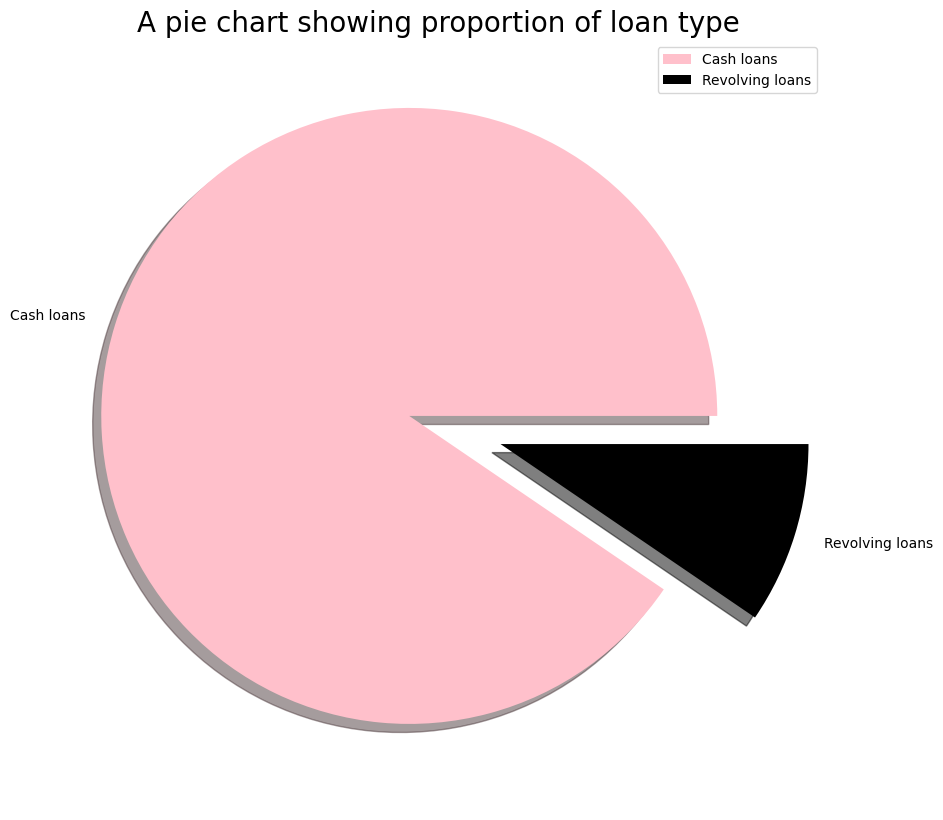

In [12]:
#loan type distribution
labels = ['Cash loans', 'Revolving loans']
colors = ['pink', 'black']
size = [278232, 29279]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart showing proportion of loan type',fontsize = 20)
plt.legend()
plt.show()

In [13]:

# checking the different types of steps involved in transactions

x = data['CNT_CHILDREN'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 11


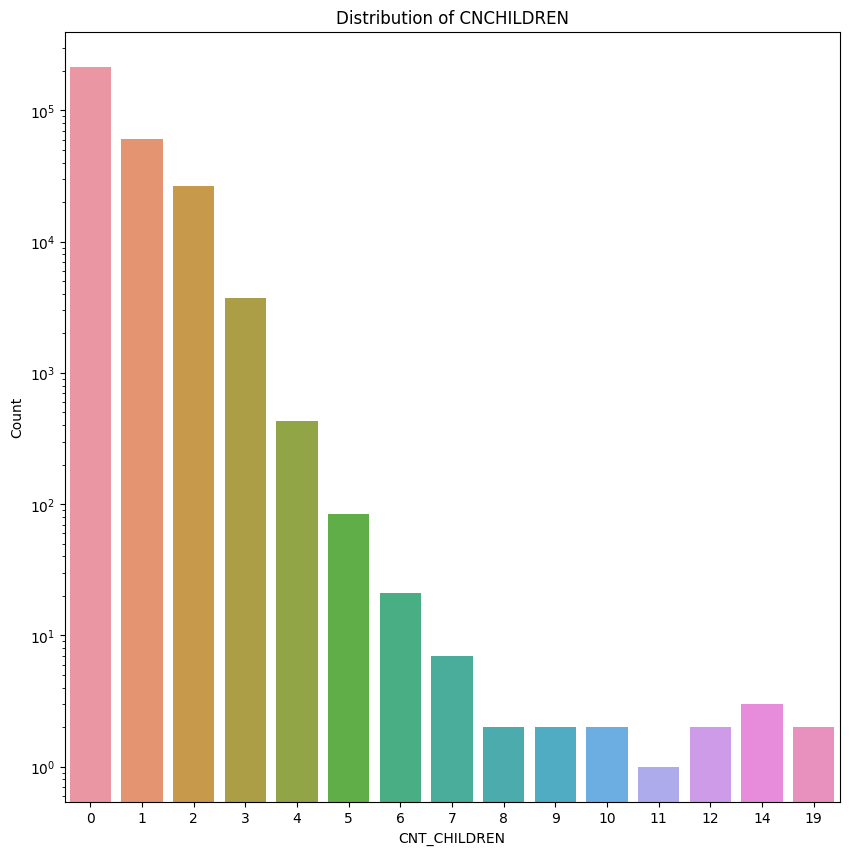

In [14]:
#Distribution of children visualization
import matplotlib.pyplot as plt
import seaborn as sns

cnt_children_counts = data['CNT_CHILDREN'].value_counts()


cnts = cnt_children_counts[cnt_children_counts != 0]

sns.barplot(x=cnts.index, y=cnts, log = True)



plt.xlabel('CNT_CHILDREN')
plt.ylabel('Count')
plt.title('Distribution of CNCHILDREN')
plt.show()

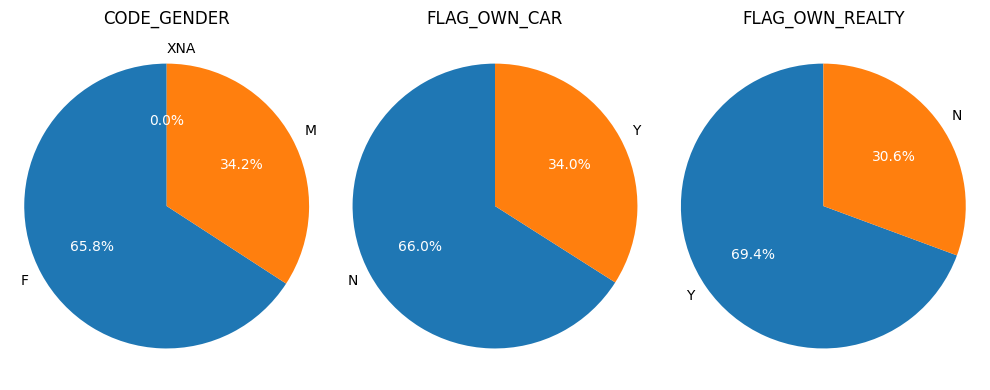

In [15]:
# samples of categorical variables distribution visualization
import matplotlib.pyplot as plt

# Define variables list of pie chart
variables = ['CODE_GENDER',	'FLAG_OWN_CAR',	'FLAG_OWN_REALTY']
num_rows = 1
num_cols = len(variables)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4))

for idx, variable in enumerate(variables):
    non_null_values = data[variable].dropna()
    value_counts = non_null_values.value_counts()

    ax = axes[idx]

    _, _, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=90)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(10)

    ax.set_title(variable)
    ax.axis('equal')

plt.tight_layout()
plt.show()

4. Data preprocessing before modeling

In [16]:
#Build up X_feature and Y and form fianl dataset
X_data = data.iloc[:, 1:]
Y_data = data['TARGET']
object_columns = X_data.select_dtypes(include=['object']).columns
X_data[object_columns] = X_data[object_columns].astype('category')
Final_data = pd.concat([X_data, Y_data], axis = 1)
Final_data

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
307507,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
307508,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [17]:
#check final dataset data type
Final_data.dtypes

NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
CNT_CHILDREN                     int64
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK     float64
AMT_REQ_CREDIT_BUREAU_MON      float64
AMT_REQ_CREDIT_BUREAU_QRT      float64
AMT_REQ_CREDIT_BUREAU_YEAR     float64
TARGET                           int64
Length: 121, dtype: object

In [18]:
#define final X dataset
X = Final_data.iloc[:, :-1]
Y = Final_data['TARGET']

4. Variables selection

In [19]:
!pip install boruta
from boruta import BorutaPy
from xgboost import XGBClassifier, plot_importance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.8 MB/s eta 0:00:00


In [20]:
import xgboost as xgb


# Define DMatrix to build up variable selection
dtrain = xgb.DMatrix(X, label=Y, enable_categorical=True)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

model = xgb.train(params, dtrain)

feature_importance = model.get_score(importance_type='gain')

for feature in X.columns:
    importance = feature_importance.get(feature, 0)
    print(f"Feature: {feature}, Importance: {importance}")

Feature: NAME_CONTRACT_TYPE, Importance: 13.168477058410645
Feature: CODE_GENDER, Importance: 33.20995330810547
Feature: FLAG_OWN_CAR, Importance: 0
Feature: FLAG_OWN_REALTY, Importance: 7.243965148925781
Feature: CNT_CHILDREN, Importance: 6.53043794631958
Feature: AMT_INCOME_TOTAL, Importance: 7.04049825668335
Feature: AMT_CREDIT, Importance: 42.08622360229492
Feature: AMT_ANNUITY, Importance: 30.475605010986328
Feature: AMT_GOODS_PRICE, Importance: 46.057640075683594
Feature: NAME_TYPE_SUITE, Importance: 0
Feature: NAME_INCOME_TYPE, Importance: 30.176076889038086
Feature: NAME_EDUCATION_TYPE, Importance: 37.66414260864258
Feature: NAME_FAMILY_STATUS, Importance: 4.568965911865234
Feature: NAME_HOUSING_TYPE, Importance: 0
Feature: REGION_POPULATION_RELATIVE, Importance: 3.8416049480438232
Feature: DAYS_BIRTH, Importance: 26.963180541992188
Feature: DAYS_EMPLOYED, Importance: 24.978256225585938
Feature: DAYS_REGISTRATION, Importance: 8.304744720458984
Feature: DAYS_ID_PUBLISH, Importan

In [21]:
#Retrieve selected feature list
feature_list1 = [feature for feature in feature_importance.keys()]
feature_list1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_WORK_PHONE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'COMMONAREA_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'N

In [22]:
#Select first 50 features
X_feature = X[feature_list1[:50]]

In [23]:
X_feature

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,YEARS_BEGINEXPLUATATION_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,COMMONAREA_MEDI
0,Cash loans,M,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,...,0.9722,0.0144,0.0690,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0144
1,Cash loans,F,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,...,0.9851,0.0497,0.0345,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0608
2,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cash loans,F,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,0,157500.0,254700.0,27558.0,225000.0,Working,Secondary / secondary special,...,0.9782,0.0172,0.0345,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.0203
307507,Cash loans,F,Y,0,72000.0,269550.0,12001.5,225000.0,Pensioner,Secondary / secondary special,...,0.9727,0.0022,0.1034,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0022
307508,Cash loans,F,Y,0,153000.0,677664.0,29979.0,585000.0,Working,Higher education,...,0.9816,0.0124,0.2069,0.2083,NaN,0.0918,0.9667,0.0,0.0000,0.0124
307509,Cash loans,F,Y,0,171000.0,370107.0,20205.0,319500.0,Commercial associate,Secondary / secondary special,...,0.9772,NaN,0.0690,NaN,NaN,NaN,0.0063,NaN,NaN,NaN


5. Data preprocessing and hyperparameters tuning

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
pd.options.mode.chained_assignment = None

In [26]:
#Label encoder for categorical features
cate_col = X_feature.select_dtypes(include = 'category').columns
encoder = LabelEncoder()
for column in cate_col:
    X_feature[column] = encoder.fit_transform(X_feature[column])

X_feature

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,YEARS_BEGINEXPLUATATION_MODE,COMMONAREA_MODE,ENTRANCES_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,COMMONAREA_MEDI
0,0,1,1,0,202500.0,406597.5,24700.5,351000.0,7,4,...,0.9722,0.0144,0.0690,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0144
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,4,1,...,0.9851,0.0497,0.0345,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0608
2,1,1,1,0,67500.0,135000.0,6750.0,135000.0,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1,1,0,121500.0,513000.0,21865.5,513000.0,7,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,157500.0,254700.0,27558.0,225000.0,7,4,...,0.9782,0.0172,0.0345,0.0417,0.0094,0.0882,0.0853,0.0,0.0125,0.0203
307507,0,0,1,0,72000.0,269550.0,12001.5,225000.0,3,4,...,0.9727,0.0022,0.1034,0.1250,0.0592,0.0220,0.0267,0.0,0.0000,0.0022
307508,0,0,1,0,153000.0,677664.0,29979.0,585000.0,7,1,...,0.9816,0.0124,0.2069,0.2083,NaN,0.0918,0.9667,0.0,0.0000,0.0124
307509,0,0,1,0,171000.0,370107.0,20205.0,319500.0,1,4,...,0.9772,NaN,0.0690,NaN,NaN,NaN,0.0063,NaN,NaN,NaN


In [ ]:
#Nan value fulfilment with mean
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

imputer = SimpleImputer(strategy='mean')

X_feature = imputer.fit_transform(X_feature)
X_feature = pd.DataFrame(X_feature)
X_feature

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,1.0,1.0,0.0,202500.0,406597.5,24700.5,351000.0,7.0,4.0,...,0.972200,0.014400,0.069000,0.125000,0.037700,0.022000,0.019800,0.000000,0.000000,0.014400
1,0.0,0.0,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,4.0,1.0,...,0.985100,0.049700,0.034500,0.333300,0.012800,0.079000,0.055400,0.000000,0.000000,0.060800
2,1.0,1.0,1.0,0.0,67500.0,135000.0,6750.0,135000.0,7.0,4.0,...,0.977065,0.042553,0.145193,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.044595
3,0.0,0.0,1.0,0.0,135000.0,312682.5,29686.5,297000.0,7.0,4.0,...,0.977065,0.042553,0.145193,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.044595
4,0.0,1.0,1.0,0.0,121500.0,513000.0,21865.5,513000.0,7.0,4.0,...,0.977065,0.042553,0.145193,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.044595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,157500.0,254700.0,27558.0,225000.0,7.0,4.0,...,0.978200,0.017200,0.034500,0.041700,0.009400,0.088200,0.085300,0.000000,0.012500,0.020300
307507,0.0,0.0,1.0,0.0,72000.0,269550.0,12001.5,225000.0,3.0,4.0,...,0.972700,0.002200,0.103400,0.125000,0.059200,0.022000,0.026700,0.000000,0.000000,0.002200
307508,0.0,0.0,1.0,0.0,153000.0,677664.0,29979.0,585000.0,7.0,1.0,...,0.981600,0.012400,0.206900,0.208300,0.064958,0.091800,0.966700,0.000000,0.000000,0.012400
307509,0.0,0.0,1.0,0.0,171000.0,370107.0,20205.0,319500.0,1.0,4.0,...,0.977200,0.042553,0.069000,0.228058,0.064958,0.105645,0.006300,0.008076,0.027022,0.044595


In [ ]:
#Apply resample
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resample, y_resample = SMOTE().fit_resample(X_feature, Y.ravel())


In [ ]:
#check scale of resample
print("Shape of x: ", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x:  (565372, 50)
Shape of y: (565372,)


In [ ]:

# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.25, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (424029, 50)
Shape of x_test:  (141343, 50)
Shape of y_train:  (424029,)
Shape of y_test:  (141343,)


In [ ]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
#hyperparameters tuning
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from skopt.callbacks import DeltaXStopper
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

# parameters space
param_space = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.1, prior='log-uniform'),
    'n_estimators': Integer(1, 10),
    'min_child_weight': Integer(1, 10),
    'gamma': Real(0, 1),
    'subsample': Real(0.5, 1),
    'colsample_bytree': Real(0.5, 1),
    'reg_alpha': Real(0, 1),
    'reg_lambda': Real(0, 1),
}

xgb = XGBClassifier(n_jobs=-1)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

bayes_cv = BayesSearchCV(
    estimator=xgb,
    search_spaces=param_space,
    n_iter=10,
    cv=cv,
    verbose=0,
    n_jobs=-1,
    scoring='accuracy',
    refit=True,
    fit_params={'eval_set': [(x_test, y_test)], 'early_stopping_rounds': 20}
)

bayes_cv.fit(x_train, y_train)

best_params = bayes_cv.best_params_

print(best_params)

OrderedDict([('colsample_bytree', 0.6394992038511529), ('gamma', 0.7596668524897059), ('learning_rate', 0.05422866264535675), ('max_depth', 9), ('min_child_weight', 9), ('n_estimators', 5), ('reg_alpha', 0.8244061724550631), ('reg_lambda', 0.34847771447423964), ('subsample', 0.811577214116165)])


In [ ]:
best_params

OrderedDict([('colsample_bytree', 0.6394992038511529),
             ('gamma', 0.7596668524897059),
             ('learning_rate', 0.05422866264535675),
             ('max_depth', 9),
             ('min_child_weight', 9),
             ('n_estimators', 5),
             ('reg_alpha', 0.8244061724550631),
             ('reg_lambda', 0.34847771447423964),
             ('subsample', 0.811577214116165)])

6. Modeling

In [ ]:
#import xgb packages
%%time
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical
from skopt.callbacks import DeltaXStopper
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

CPU times: user 155 µs, sys: 13 µs, total: 168 µs
Wall time: 176 µs


In [ ]:
#train model with best parameters
model = XGBClassifier(**best_params)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import average_precision_score

In [ ]:
#show Precision Recall Curve score
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.920968906399199


In [ ]:
#show confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[69630   870]
 [ 9505 61338]]


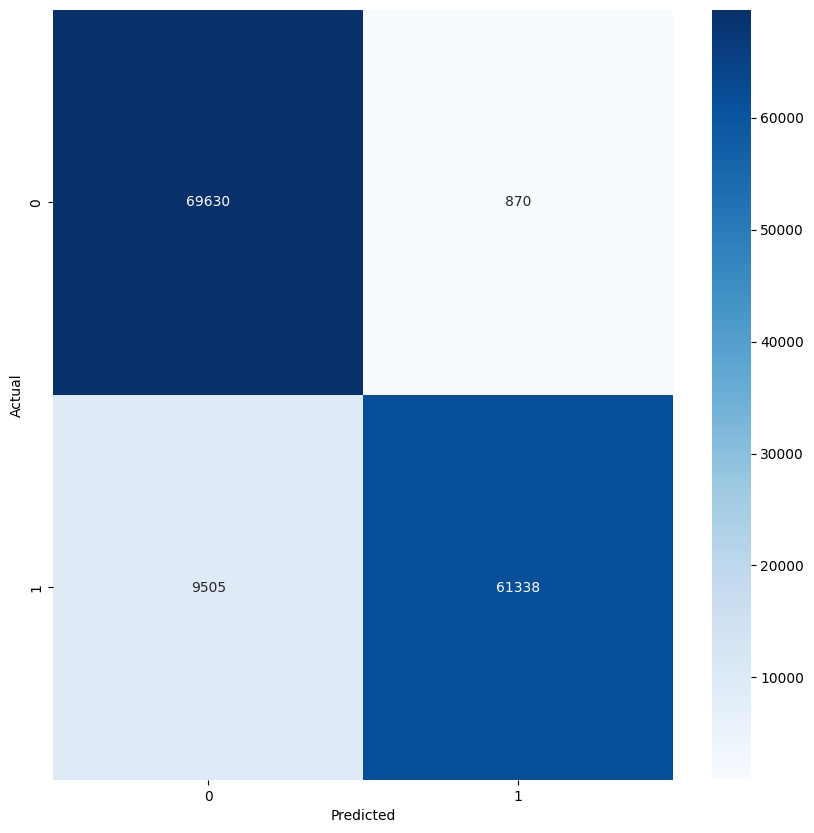

In [ ]:
#confusion matrix visualization
import matplotlib.pyplot as plt


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

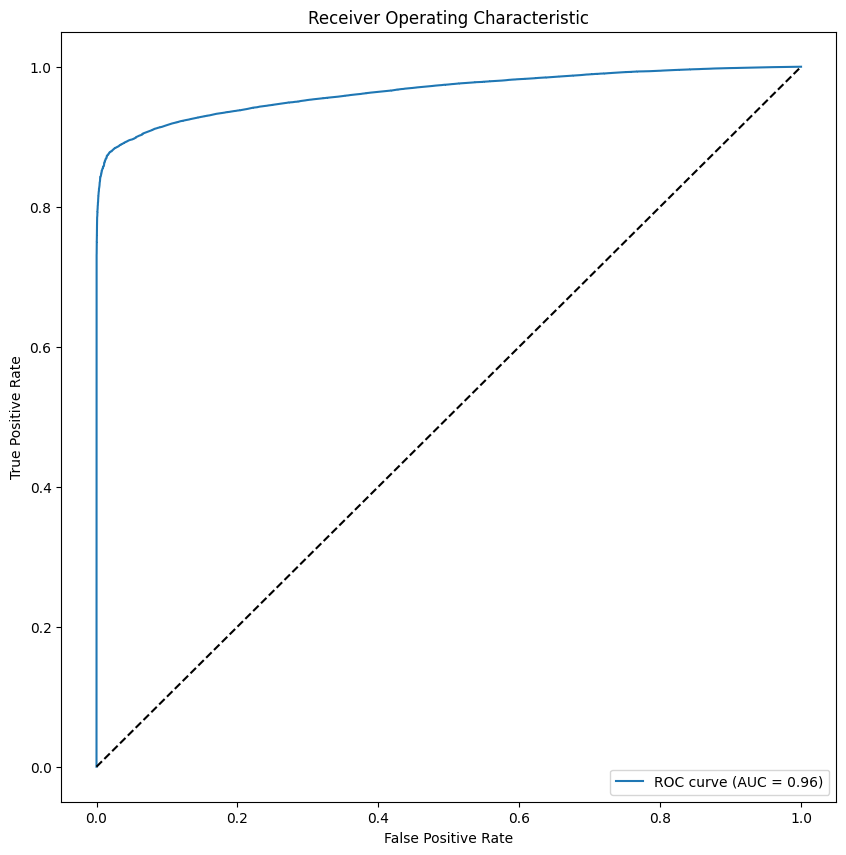

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(x_test)[:, 1]

# Calculate ROC data
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

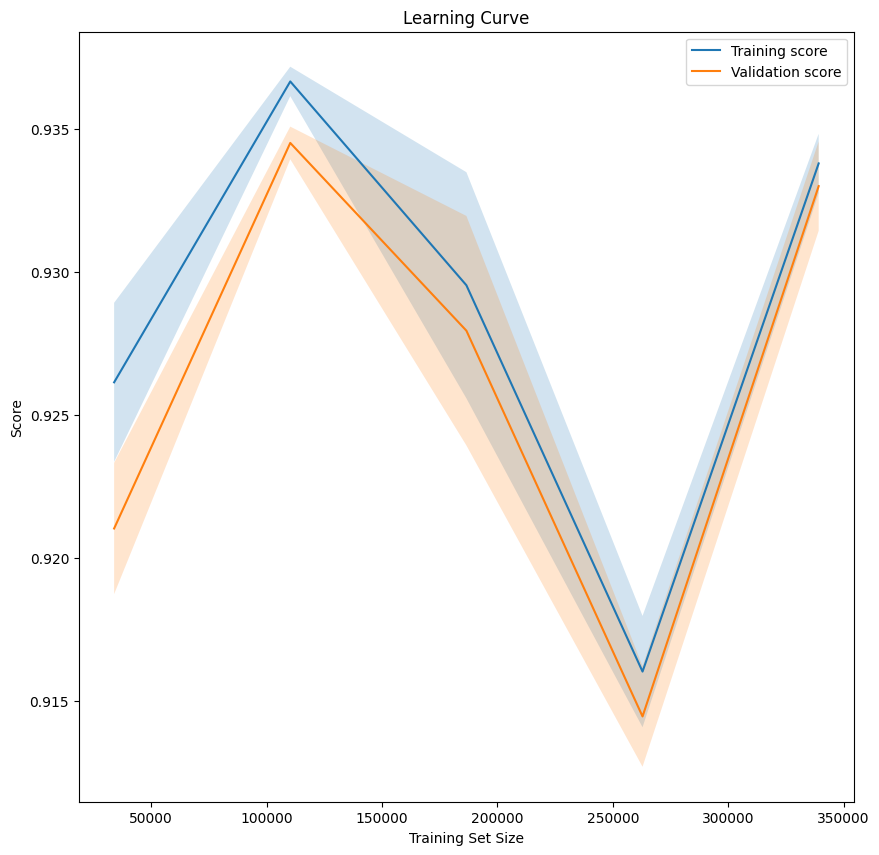

In [ ]:
#learning curve visualization
from sklearn.model_selection import learning_curve

# calculate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, cv=5)


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.plot(train_sizes, train_mean, label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()